<a href="https://colab.research.google.com/github/BhumikaMatharu/MultiClass-Emoji-Classification/blob/master/MultiClass_Emoji_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import csv
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving locations.csv to locations.csv


In [ ]:
!ls

emo_count.csv  gdrive  locations.csv  sample_data  test.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive"

In [ ]:
train = pd.read_csv('locations.csv')    # reading the csv file
train.head() 

,id,Emotions,grinning_face,loudly_crying_face,astonished_face,winking_face,face_with_medical_mask
0,test0.png,['grinning_face'],1,0,0,0,0
1,test1.png,['winking_face'],0,0,0,1,0
2,test2.png,['winking_face'],0,0,0,1,0
3,test3.png,"['face_with_medical_mask', 'winking_face', 'gr...",3,0,0,2,1
4,test4.png,"['winking_face', 'loudly_crying_face']",0,2,0,1,0


In [ ]:
train.columns

Index(['id', 'Emotions', 'grinning_face', 'loudly_crying_face',
       'astonished_face', 'winking_face', 'face_with_medical_mask'],
      dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/gdrive/My Drive/colab_data_2/'+train['id'][i],target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1000/1000 [09:27<00:00,  1.76it/s]


In [ ]:
X.shape

(1000, 64, 64, 3)

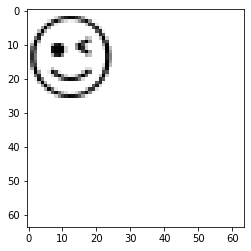

In [ ]:
plt.imshow(X[2])

In [ ]:
train['winking_face'][2]

1

In [ ]:
y = np.array(train.drop(['id', 'Emotions'],axis=1))

In [ ]:
y.shape

(1000, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=15)

Epoch 1/10
60/60 [==============================] - 4s 63ms/step - loss: 0.9904 - accuracy: 0.3767 - val_loss: 1.0023 - val_accuracy: 0.3500
Epoch 2/10
60/60 [==============================] - 4s 60ms/step - loss: 0.9935 - accuracy: 0.3800 - val_loss: 0.9881 - val_accuracy: 0.3600
Epoch 3/10
60/60 [==============================] - 4s 60ms/step - loss: 0.9859 - accuracy: 0.3533 - val_loss: 0.9613 - val_accuracy: 0.3100
Epoch 4/10
60/60 [==============================] - 4s 61ms/step - loss: 0.9859 - accuracy: 0.3756 - val_loss: 0.9668 - val_accuracy: 0.3500
Epoch 5/10
60/60 [==============================] - 4s 61ms/step - loss: 0.9721 - accuracy: 0.3878 - val_loss: 0.9768 - val_accuracy: 0.3600
Epoch 6/10
60/60 [==============================] - 4s 61ms/step - loss: 0.9744 - accuracy: 0.3700 - val_loss: 0.9703 - val_accuracy: 0.3200
Epoch 7/10
60/60 [==============================] - 4s 61ms/step - loss: 0.9607 - accuracy: 0.3933 - val_loss: 0.9383 - val_accuracy: 0.3100
Epoch 8/10
60

In [ ]:
test_img = 'test811.png'
img = image.load_img('/content/gdrive/My Drive/colab_data_2/'+test_img,target_size=(64,64,3))
img = image.img_to_array(img)
img = img/255
count = 0
with open('/content/emo_count.csv','r') as emo:
    csvReader = csv.reader(emo)
    for row in csvReader:
      if row[0]==test_img:
        count = row[1]
print(count)


3


Predicted Classification:
grinning_face
winking_face
astonished_face

Probabilities of each class:
{'grinning_face': 0.6182476, 'loudly_crying_face': 0.08102524, 'astonished_face': 0.097551264, 'winking_face': 0.11303256, 'face_with_medical_mask': 0.09014323}


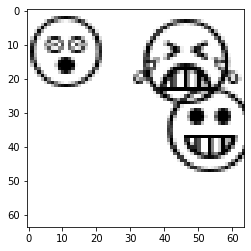

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,64,64,3))
top_3 = np.argsort(proba[0])[:-4:-1]
emotions = {}
print("Predicted Classification:")
for i in range(int(count)):
    # print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
    print("{}".format(classes[top_3[i]]))
print()
print("Probabilities of each class:")
for p in range(len(proba[0])):
    emotions[classes[p]] = proba[0][p]
print(emotions) 

plt.imshow(img)